### Ntuplizer for fast tracker studies

In [9]:
ls /eos/cms/store/user/xcoubez/SiStripNtuples/

test_shallowClustersProducer.root
test_shallowDigisProducer.root
test_shallowEventDataProducer.root
test_shallowGeneralProducer1.root
test_shallowGeneralProducer2.root
test_shallowGeneralProducer3.root
test_shallowGeneralProducer4.root
test_shallowGeneralProducer4_1000.root
test_shallowGeneralProducer4_1000collisions.root
test_shallowGeneralProducer4_1000cosmics.root
test_shallowGeneralProducer4_1000last.root
test_shallowGeneralProducer_forEmily.root
test_shallowRechitClustersProducer.root
test_shallowTrackClustersProducer.root
test_shallowTracksProducer.root


In [10]:
import ROOT

In [11]:
f_e = ROOT.TFile("/eos/cms/store/user/xcoubez/SiStripNtuples/test_shallowEventDataProducer.root")
t_e = f_e.Get("testTree/tree")

f_c = ROOT.TFile("/eos/cms/store/user/xcoubez/SiStripNtuples/test_shallowClustersProducer.root")
t_c = f_c.Get("testTree/tree")

f_r = ROOT.TFile("/eos/cms/store/user/xcoubez/SiStripNtuples/test_shallowRechitClustersProducer.root")
t_r = f_r.Get("testTree/tree")

f_t = ROOT.TFile("/eos/cms/store/user/xcoubez/SiStripNtuples/test_shallowTracksProducer.root")
t_t = f_t.Get("testTree/tree")

#f_ct = 
#t_ct = 

f_MC = ROOT.TFile("/eos/cms/store/user/xcoubez/SiStripNtuples/test_shallowGeneralProducer4_1000.root")
t_MC = f_MC.Get("testTree/tree")

f_Collision = ROOT.TFile("/eos/cms/store/user/xcoubez/SiStripNtuples/test_shallowGeneralProducer4_1000collisions.root")
t_Collision = f_Collision.Get("testTree/tree")

f_Cosmics = ROOT.TFile("/eos/cms/store/user/xcoubez/SiStripNtuples/test_shallowGeneralProducer4_1000cosmics.root")
t_Cosmics = f_Cosmics.Get("testTree/tree")

f_CosmicsforEmily = ROOT.TFile("/eos/cms/store/user/xcoubez/SiStripNtuples/test_shallowGeneralProducer_forEmily.root")
t_CosmicsforEmily = f_CosmicsforEmily.Get("testTree/tree")

In [ ]:
#t_e.Print()

In [ ]:
#t_c.Print()

In [ ]:
#t_r.Print()

In [ ]:
#t_t.Print()

In [ ]:
#t.Print()

In [12]:
t_CosmicsforEmily.Print()

******************************************************************************
*Tree    :tree      :                                                        *
*Entries :     1000 : Total =        24222628 bytes  File  Size =    9330076 *
*        :          : Tree compression factor =   2.59                       *
******************************************************************************
*Br    0 :TrigPh    : vector<bool>                                           *
*Entries :     1000 : Total  Size=     142887 bytes  File Size  =       4976 *
*Baskets :        5 : Basket Size=      32000 bytes  Compression=  28.62     *
*............................................................................*
*Br    1 :TrigTech  : vector<bool>                                           *
*Entries :     1000 : Total  Size=      78739 bytes  File Size  =       3797 *
*Baskets :        3 : Basket Size=      32000 bytes  Compression=  20.61     *
*...................................................

In [13]:
# event information (for future matching of consecutiver runs)
h_run = ROOT.TH1F("evt_run", ";run number;", 100, 0, 100)

# track information
h_trackpt = ROOT.TH1F("t_pt", ";tracks p_T;", 100, 0., 100)

# cluster information
h_clusterston = ROOT.TH1F("c_ston", ";S over N;", 100, 0., 100)

# cluster track information
h_tsosclusterston = ROOT.TH1F("tsos_c_ston", ";S over N on tracks;", 100, 0., 100)

# noise
h_noise = ROOT.TH2F("noise_x_y", "noise in global x-y plane;x;y", 500, -50., 50., 500, -50., 50.)


In [14]:
for event in t_CosmicsforEmily:
    #print event.run, event.lumi, event.event
    #print "Number of clusters: ", event.clustereta.size()
    
    for cluster in range(event.clustereta.size()):
        #print "S over N", cluster, event.clusterston[cluster]
        h_clusterston.Fill( event.clusterston[cluster] )
        if event.clusterston[cluster] > 10 :
            h_noise.Fill(event.clusterglobalx[cluster], event.clusterglobaly[cluster])
            print event.clusterdetid[cluster] , int(event.clusterston[cluster])

369125773 19
369125773 77
369154204 62
369154204 62
369169996 12
402672274 10
402672298 56
436244618 32
436245817 12
436249041 14
436265236 11
436298084 15
436298084 17
436310168 17
436310168 25
436310168 15
436310168 118
470066024 51
470066024 67
470066024 22
470078502 13
470081834 15
470082602 13
470115398 38
470116521 81
470311564 10
470325285 36
470341414 13
470344648 18
470345254 12
470361324 12
470373320 77
470377126 38
470377545 12
470389413 10
470421934 114
470427884 19
470438604 29
369136678 32
369141086 66
369153432 12
369154204 62
369173796 102
369173796 10
369173796 12
369173796 13
369173796 11
369173796 36
369173796 33
436228757 14
436229422 13
436232378 43
436233114 22
436262576 12
436282500 43
436282820 290
436282820 138
436312152 10
470046758 15
470062820 112
470062820 20
470065772 13
470094918 18
470165736 29
470177764 17
470307972 38
470307972 16
470311920 10
470340134 10
470341037 10
470344176 10
470344940 10
470345381 40
470378692 22
470389956 13
470411496 27
369125

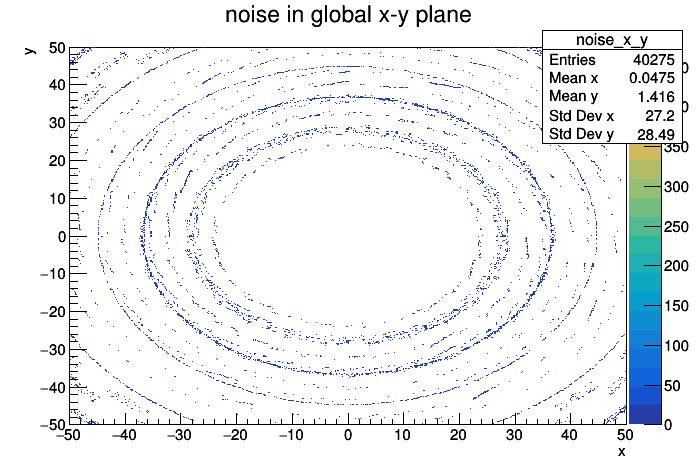

In [16]:
c1 = ROOT.TCanvas()
h_noise.Draw("COLZ")
c1.Draw()